In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

In [ ]:
traindf = pd.read_csv("/content/train.csv")
testdf = pd.read_csv("/content/test.csv")

In [ ]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
traindf.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
traindf.groupby(['Pclass'], as_index=False).agg({'Survived':'mean'})

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
traindf.groupby(['Sex'], as_index=False).agg({'Survived':'mean'})

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
traindf.groupby(['SibSp'], as_index=False).agg({'Survived':'mean'})

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
traindf.groupby(['Parch'], as_index=False).agg({'Survived':'mean'})

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [ ]:
traindf['Family_Size'] = traindf['Parch'] + traindf['SibSp'] + 1
testdf['Family_Size'] = testdf['Parch'] + testdf['SibSp'] + 1

In [ ]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
traindf.groupby(['Family_Size'],as_index=False).agg({'Survived':'mean'})

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [ ]:
family_map = {1:'Alone', 2:'Small', 3:'Small', 4:'Small', 5:'Medium', 6:'Medium', 7:'large', 8:'Large', 9:'large'}
traindf['Family_size_Grouped'] =traindf['Family_Size'].map(family_map)
testdf['Family_size_Grouped'] =testdf['Family_Size'].map(family_map)

In [ ]:
traindf.groupby(['Embarked'],as_index=False).agg({'Survived':'mean'})

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


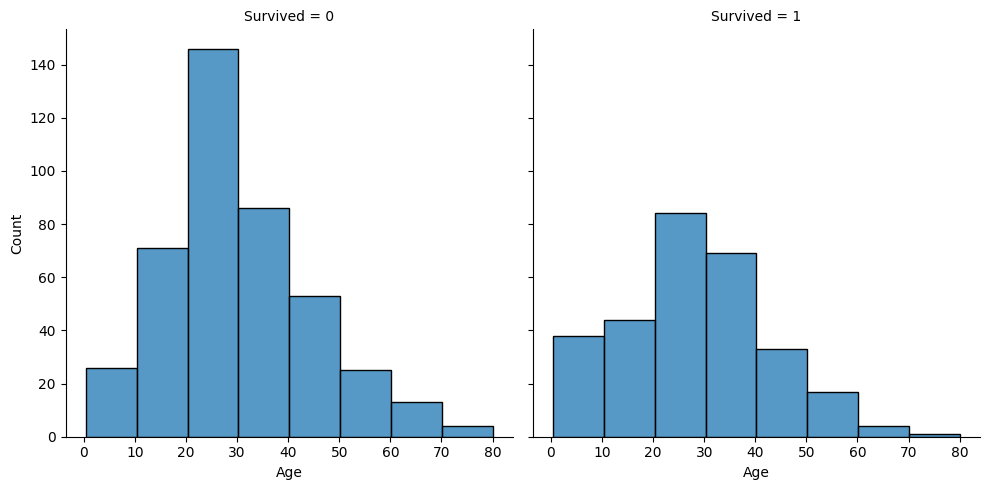

In [ ]:
sns.displot(traindf, x='Age', col='Survived', binwidth=10, height=5)

In [ ]:
traindf['Age_cut'] = pd.qcut(traindf['Age'], 5)
testdf['Age_cut'] = pd.qcut(testdf['Age'], 5)

In [ ]:
traindf.groupby(['Age_cut'], as_index=False).agg({'Survived':'mean'})

<ipython-input-22-689698e62f35>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  traindf.groupby(['Age_cut'], as_index=False).agg({'Survived':'mean'})


,Age_cut,Survived
0,"(0.419, 19.0]",0.481707
1,"(19.0, 25.0]",0.328467
2,"(25.0, 31.8]",0.393701
3,"(31.8, 41.0]",0.437500
4,"(41.0, 80.0]",0.373239


In [ ]:
traindf.loc[traindf['Age'] <=19.0, 'Age'] = 0
testdf.loc[testdf['Age'] <=19.0, 'Age'] = 0

traindf.loc[(traindf['Age'] >19.0) & (traindf['Age'] <=25.0), 'Age'] = 1
testdf.loc[(testdf['Age'] >19.0) & (testdf['Age'] <=25.0), 'Age'] = 1

traindf.loc[(traindf['Age'] >25.0) & (traindf['Age'] <=31.8), 'Age'] = 2
testdf.loc[(testdf['Age'] >25.0) & (testdf['Age'] <=31.8), 'Age'] = 2

traindf.loc[(traindf['Age'] >31.8) & (traindf['Age'] <=41.0), 'Age'] = 3
testdf.loc[(testdf['Age'] >31.8) & (testdf['Age'] <=41.0), 'Age'] = 3

traindf.loc[(traindf['Age'] >41.0) & (traindf['Age'] <=80.0), 'Age'] = 4
testdf.loc[(testdf['Age'] >41.0) & (testdf['Age'] <=80.0), 'Age'] = 4

traindf.loc[traindf['Age'] > 80, 'Age']
testdf.loc[testdf['Age'] > 80.0, 'Age']

,Age


In [ ]:
traindf['Fare_Cut'] = pd.qcut(traindf['Fare'], 5)
testdf['Fare_Cut'] = pd.qcut(testdf['Fare'], 5)

In [ ]:
traindf.groupby(['Fare_Cut'],as_index=False).agg({'Survived':'mean'})

<ipython-input-25-c38b940382fe>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  traindf.groupby(['Fare_Cut'],as_index=False).agg({'Survived':'mean'})


,Fare_Cut,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [ ]:
traindf.loc[traindf['Fare'] <=7.854, 'Fare'] = 0
testdf.loc[testdf['Fare'] <=7.854, 'Fare'] = 0

traindf.loc[(traindf['Fare'] >7.854) & (traindf['Fare'] <=10.5), 'Fare'] = 1
testdf.loc[(testdf['Fare'] >7.854) & (testdf['Fare'] <=10.5), 'Fare'] = 1

traindf.loc[(traindf['Fare'] >10.5) & (traindf['Fare'] <=21.679), 'Fare'] = 2
testdf.loc[(testdf['Fare'] >10.5) & (testdf['Fare'] <=21.679), 'Fare'] = 2

traindf.loc[(traindf['Fare'] >21.679) & (traindf['Fare'] <=39.688), 'Fare'] = 3
testdf.loc[(testdf['Fare'] >21.679) & (testdf['Fare'] <=39.688), 'Fare'] = 3

traindf.loc[(traindf['Fare'] >39.688) & (traindf['Fare'] <=512.329), 'Fare'] = 4
testdf.loc[(testdf['Fare'] >39.688) & (testdf['Fare'] <=512.329), 'Fare'] = 4

traindf.loc[(traindf['Fare'] >512.329) , 'Fare']
testdf.loc[(testdf['Fare'] >512.329) , 'Fare']

,Fare
343,512.3292


In [ ]:
traindf['Title'] = traindf['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.',expand=True)[0].str.strip()
testdf['Title'] = testdf['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.',expand=True)[0].str.strip()

In [ ]:
traindf.groupby(['Title'], as_index=False).agg({'Survived':'mean'})

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [ ]:
traindf['Title'] = traindf['Title'].replace({
    'Capt':'Military',
    'Col':'Military',
    'Major':'Military',
    'Jonkheer':'Noble',
    'Don':'Noble',
    'the Countess':'Noble',
    'Lady':'Noble',
    'Sir':'Noble',
    'Mlle':'Noble',
    'Ms':'Noble',
    'Mme':'Noble',
    'Nobel':'Noble'
})

testdf['Title'] = testdf['Title'].replace({
    'Capt':'Military',
    'Col':'Military',
    'Major':'Military',
    'Jonkheer':'Noble',
    'Don':'Noble',
    'the Countess':'Noble',
    'Lady':'Noble',
    'Sir':'Noble',
    'Mlle':'Noble',
    'Ms':'Noble',
    'Mme':'Noble',
    'Nobel':'Noble'
})

In [ ]:
traindf.groupby(['Title'],as_index=False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [ ]:
traindf['Name_length'] = traindf['Name'].apply(lambda x: len(x))
testdf['Name_length'] = testdf['Name'].apply(lambda x: len(x))

In [ ]:
traindf['Name_lengthGB'] = pd.qcut(traindf['Name_length'], 3)
testdf['Name_lengthGB'] = pd.qcut(testdf['Name_length'],3)

In [ ]:
traindf.groupby(['Name_lengthGB'], as_index=False)['Survived'].mean()

<ipython-input-33-df9b2399c65d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  traindf.groupby(['Name_lengthGB'], as_index=False)['Survived'].mean()


,Name_lengthGB,Survived
0,"(11.999, 22.0]",0.252336
1,"(22.0, 28.0]",0.322581
2,"(28.0, 82.0]",0.587629


In [ ]:
traindf.loc[traindf['Name_length'] <=22.0, 'Name_Size'] = 0
testdf.loc[testdf['Name_length'] <=22.0, 'Name_Size'] = 0

traindf.loc[(traindf['Name_length'] >22.0) & (traindf['Name_length'] <=28.0), 'Name_Size'] = 1
testdf.loc[(testdf['Name_length'] >22.0) & (testdf['Name_length'] <=28.0), 'Name_Size'] = 1

traindf.loc[(traindf['Name_length'] >28.0) & (traindf['Name_length'] <=82.0), 'Name_Size'] = 2
testdf.loc[(testdf['Name_length'] >28.0) & (testdf['Name_length'] <=82.0), 'Name_Size'] = 2

traindf.loc[(traindf['Name_length'] >82.0), 'Name_Size']
testdf.loc[(testdf['Name_length'] >82.0) , 'Name_Size']

,Name_Size


In [ ]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_size_Grouped,Age_cut,Fare_Cut,Title,Name_length,Name_lengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(19.0, 25.0]","(-0.001, 7.854]",Mr,23,"(22.0, 28.0]",1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,4.0,C85,C,2,Small,"(31.8, 41.0]","(39.688, 512.329]",Mrs,51,"(28.0, 82.0]",2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(25.0, 31.8]","(7.854, 10.5]",Miss,22,"(11.999, 22.0]",0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,4.0,C123,S,2,Small,"(31.8, 41.0]","(39.688, 512.329]",Mrs,44,"(28.0, 82.0]",2.0
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,1.0,NaN,S,1,Alone,"(31.8, 41.0]","(7.854, 10.5]",Mr,24,"(22.0, 28.0]",1.0


In [ ]:
traindf['TicketNumber'] = traindf['Ticket'].apply(lambda x :pd.Series({'Ticket':x.split()[-1]}))
testdf['TicketNumber'] = testdf['Ticket'].apply(lambda x :pd.Series({'Ticket':x.split()[-1]}))

In [ ]:
traindf.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values(by='count', ascending=False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [ ]:
traindf.groupby('TicketNumber')['TicketNumber'].transform('count')

,TicketNumber
0,1
1,1
2,1
3,2
4,1
...,...
886,1
887,1
888,2
889,1


In [ ]:
traindf['TicketNumber_Count'] = traindf.groupby('TicketNumber')['TicketNumber'].transform('count')
testdf['TicketNumber_Count'] = testdf.groupby('TicketNumber')['TicketNumber'].transform('count')

In [ ]:
traindf.groupby('TicketNumber_Count', as_index=False)['Survived'].agg(['count', 'mean']).sort_values(by='count', ascending=False)

,TicketNumber_Count,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [ ]:
traindf['Ticket']


,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [ ]:
traindf['Ticket'].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [ ]:
traindf['TicketLocation'] = np.where(traindf['Ticket'].str.split(pat=" ", expand=True)[1].notna(), traindf['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
testdf['TicketLocation'] = np.where(testdf['Ticket'].str.split(pat=" ", expand=True)[1].notna(), testdf['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [ ]:
traindf['TicketLocation'].value_counts()

,count
TicketLocation,
Blank,665
PC,60
C.A.,27
STON/O,12
A/5,10
W./C.,9
CA.,8
SOTON/O.Q.,8
SOTON/OQ,7


In [ ]:
traindf['TicketLocation'] = traindf['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',
})
testdf['TicketLocation'] = testdf['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',
})

In [ ]:
traindf.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


In [ ]:
traindf['Cabin'] = traindf['Cabin'].fillna('U')
testdf['Cabin'] = testdf['Cabin'].fillna('U')

In [ ]:
traindf['Cabiin_Assign'] = traindf['Cabin'].apply(lambda x: 0 if x == 'U' else 1)
testdf['Cabiin_Assign'] = testdf['Cabin'].apply(lambda x: 0 if x == 'U' else 1)

In [ ]:
traindf.groupby('Cabiin_Assign')['Survived'].mean()

,Survived
Cabiin_Assign,
0,0.299854
1,0.666667


In [ ]:
traindf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  714 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    float64 
 10  Cabin                891 non-null    object  
 11  Embarked             889 non-null    object  
 12  Family_Size          891 non-null    int64   
 13  Family_size_Grouped  884 non-null    object  
 14  Age_cut              714 non-null    category
 15  Fare_Cut             89

In [ ]:
traindf['Age'] = traindf['Age'].fillna(traindf['Age'].mean())
testdf['Age'] = testdf['Age'].fillna(testdf['Age'].mean())
testdf['Fare'] = testdf['Fare'].fillna(testdf['Fare'].mean())

In [ ]:
testdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Pclass               418 non-null    int64   
 2   Name                 418 non-null    object  
 3   Sex                  418 non-null    object  
 4   Age                  418 non-null    float64 
 5   SibSp                418 non-null    int64   
 6   Parch                418 non-null    int64   
 7   Ticket               418 non-null    object  
 8   Fare                 418 non-null    float64 
 9   Cabin                418 non-null    object  
 10  Embarked             418 non-null    object  
 11  Family_Size          418 non-null    int64   
 12  Family_size_Grouped  414 non-null    object  
 13  Age_cut              332 non-null    category
 14  Fare_Cut             417 non-null    category
 15  Title                41

In [ ]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder()
si = SimpleImputer(strategy='most_frequent')

In [ ]:
ode_col = ['Family_size_Grouped']
ohe_col = ['Sex', 'Embarked']

In [ ]:
x = traindf.drop(columns=['Survived'])
y = traindf['Survived']
x_test = testdf.drop(columns=['Age_cut', 'Fare_Cut'])

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size=0.2,stratify=y, random_state=42)

In [ ]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1 ))
])

In [ ]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_size_Grouped', 'Age_cut', 'Fare_Cut', 'Title', 'Name_length',
       'Name_lengthGB', 'Name_Size', 'TicketNumber', 'TicketNumber_Count',
       'TicketLocation', 'Cabiin_Assign'],
      dtype='object')

In [ ]:
col_trans = ColumnTransformer(transformers=[
    ('impute',si,['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_col),
    ('ohe_pipeline',ohe_pipeline, ohe_col ),
    ('passthrough', 'passthrough', ['Pclass', 'TicketNumber_Count', 'Cabiin_Assign', 'Name_Size', 'Age', 'Fare'])
    ],remainder='drop',n_jobs=-1
)

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
param_grid = {
    'n_estimators': [150, 200, 300, 500],
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 13, 15, 17, 20],
    'min_samples_leaf': [2, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                   'TicketNumber_Count',
                                                   'Cabiin_Assign', 'Name_Size',
                                                   'Age', 'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 13, 15, 17, 20],
                                          'min_samples_leaf': [2, 4, 5, 6],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [150, 200, 300,
                                                           500]}))])

In [ ]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
0.8273121244952231


In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
param_grid ={
    'min_samples_split': [5,10,15],
    'max_depth':[10,20,30],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini', 'entropy']
}

In [ ]:
CV_dtree = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinaldtree = make_pipeline(col_trans, CV_dtree)
pipefinaldtree.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumber_Count',
                                                   'Cabiin_Assign', 'Name_Size',
                                                   'Age', 'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [ ]:
print(CV_dtree.best_params_)
print(CV_dtree.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.8090219639515415


In [ ]:
knn = KNeighborsClassifier()

In [ ]:
param_grid ={
    'n_neighbors':[3,5,7,9,11],
    'weights':['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p':[1,2]
}

In [ ]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumber_Count',
                                                   'Cabiin_Assign', 'Name_Size',
                                                   'Age', 'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [ ]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'brute', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
0.8062444597655866


In [ ]:
svc =SVC()

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
}

In [ ]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumber_Count',
                                                   'Cabiin_Assign', 'Name_Size',
                                                   'Age', 'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(),
                              param_grid={'C': [0.1, 1, 10, 100],
                                          'gamma': ['scale', 'auto', 0.01, 0.1,
                                                    1],
                                          'kernel': ['linear', 'rbf', 'poly',
                                                     'sigmoid']}))])

In [ ]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.8287008765882005


In [ ]:
lr = LogisticRegression()

In [ ]:
param_grid ={
    'C':[100,10,1.0,0.1, 0.01,0.001,]
}

In [ ]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinallr = make_pipeline(col_trans, CV_lr)
pipefinallr.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumber_Count',
                                                   'Cabiin_Assign', 'Name_Size',
                                                   'Age', 'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.01,
                                                0.001]}))])

In [ ]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 10}
0.7949965527430317


In [ ]:
gnb = GaussianNB()

In [ ]:
param_grid ={
    'var_smoothing':[0.000000001, 0.000000001, 0.000000001]
}

In [ ]:
CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalgnb = make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumber_Count',
                                                   'Cabiin_Assign', 'Name_Size',
                                                   'Age', 'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-09, 1e-09,
                                                            1e-09]}))])

In [ ]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-09}
0.8006106569486852


In [ ]:
rfcpred = pipefinalrfc.predict(x_test)
dtreepred = pipefinaldtree.predict(x_test)
knnpred = pipefinalknn.predict(x_test)
svcpred = pipefinalsvc.predict(x_test)
lrpred = pipefinallr.predict(x_test)
gnbpred = pipefinalgnb.predict(x_test)

In [ ]:
rfcresult = pd.DataFrame({
    'PassengerId': testdf['PassengerId'],
    'Survived': rfcpred
})

dtreeresult = pd.DataFrame({
    'PassengerId': testdf['PassengerId'],
    'Survived': dtreepred
})

knnresult = pd.DataFrame({
    'PassengerId': testdf['PassengerId'],
    'Survived': knnpred
})

svcresult = pd.DataFrame({
    'PassengerId': testdf['PassengerId'],
    'Survived': svcpred
})

lrresult = pd.DataFrame({
    'PassengerId': testdf['PassengerId'],
    'Survived': lrpred
})

gnbresult = pd.DataFrame({
    'PassengerId': testdf['PassengerId'],
    'Survived': gnbpred
})


In [ ]:
rfcresult.to_csv("rfcresult.csv", index=False)
dtreeresult.to_csv("dtreeresult.csv", index=False)
knnresult.to_csv("knnresult.csv", index=False)
svcresult.to_csv("svcresult.csv", index=False)
lrresult.to_csv("lrresult.csv", index=False)
gnbresult.to_csv("gnbresult.csv", index=False)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
gbc = GradientBoostingClassifier()

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 5, 10],  # Minimum samples in a leaf node
}


In [ ]:
gbc_cv = GridSearchCV(gbc, param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalgbc = make_pipeline(col_trans,gbc_cv)
pipefinalgbc.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                   'TicketNumber_Count',
                                                   'Cabiin_Assign', 'Name_Size',
                                                   'Age', 'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GradientBoostingClassifier(),
                              param_grid={'learning_rate': [0.01, 0.1, 0.2],
                                          'max_depth': [3, 5, 7],
                                          'min_samples_leaf': [1, 5, 10],
                                          'min_samples_split': [2, 5, 10],
                                          'n_estimators': [100, 200, 500]}))])

In [ ]:
print(gbc_cv.best_params_)
print(gbc_cv.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}
0.8300994779868021


In [ ]:
adaboost = AdaBoostClassifier()
param_grid = {
    'n_estimators': [50, 100, 200, 500],  # Number of weak learners (trees)
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],  # Weight of weak learners
    'estimator': [None],  # Default is DecisionTreeClassifier(max_depth=1)
}


In [ ]:
adaboost_cv = GridSearchCV(adaboost, param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinaladaboost = make_pipeline(col_trans,adaboost_cv)
pipefinaladaboost.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumber_Count',
                                                   'Cabiin_Assign', 'Name_Size',
                                                   'Age', 'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=AdaBoostClassifier(),
                              param_grid={'estimator': [None],
                                          'learning_rate': [0.001, 0.01, 0.1,
                                                            0.5, 1],
                                          'n_estimators': [50, 100, 200,
                                                           500]}))])

In [ ]:
print(adaboost_cv.best_params_)
print(adaboost_cv.best_score_)

{'estimator': None, 'learning_rate': 1, 'n_estimators': 500}
0.807633211858564


In [ ]:
gbcpred = pipefinalgbc.predict(x_test)
adaboostpred = pipefinaladaboost.predict(x_test)

In [ ]:
gbcresult = pd.DataFrame({
    'PassengerId': testdf['PassengerId'],
    'Survived': gbcpred
})

adaboostresult = pd.DataFrame({
    'PassengerId': testdf['PassengerId'],
    'Survived': adaboostpred
})

In [ ]:
gbcresult.to_csv("gbcresult.csv", index=False)
adaboostresult.to_csv("adaboostresult.csv", index=False)